In [1]:
from inference import DonutInference

/home/rjn/miniconda3/envs/ttb/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
infer = DonutInference(model_pth="katanaml-org/invoices-donut-model-v1",device="cuda")

In [5]:
from PIL import Image

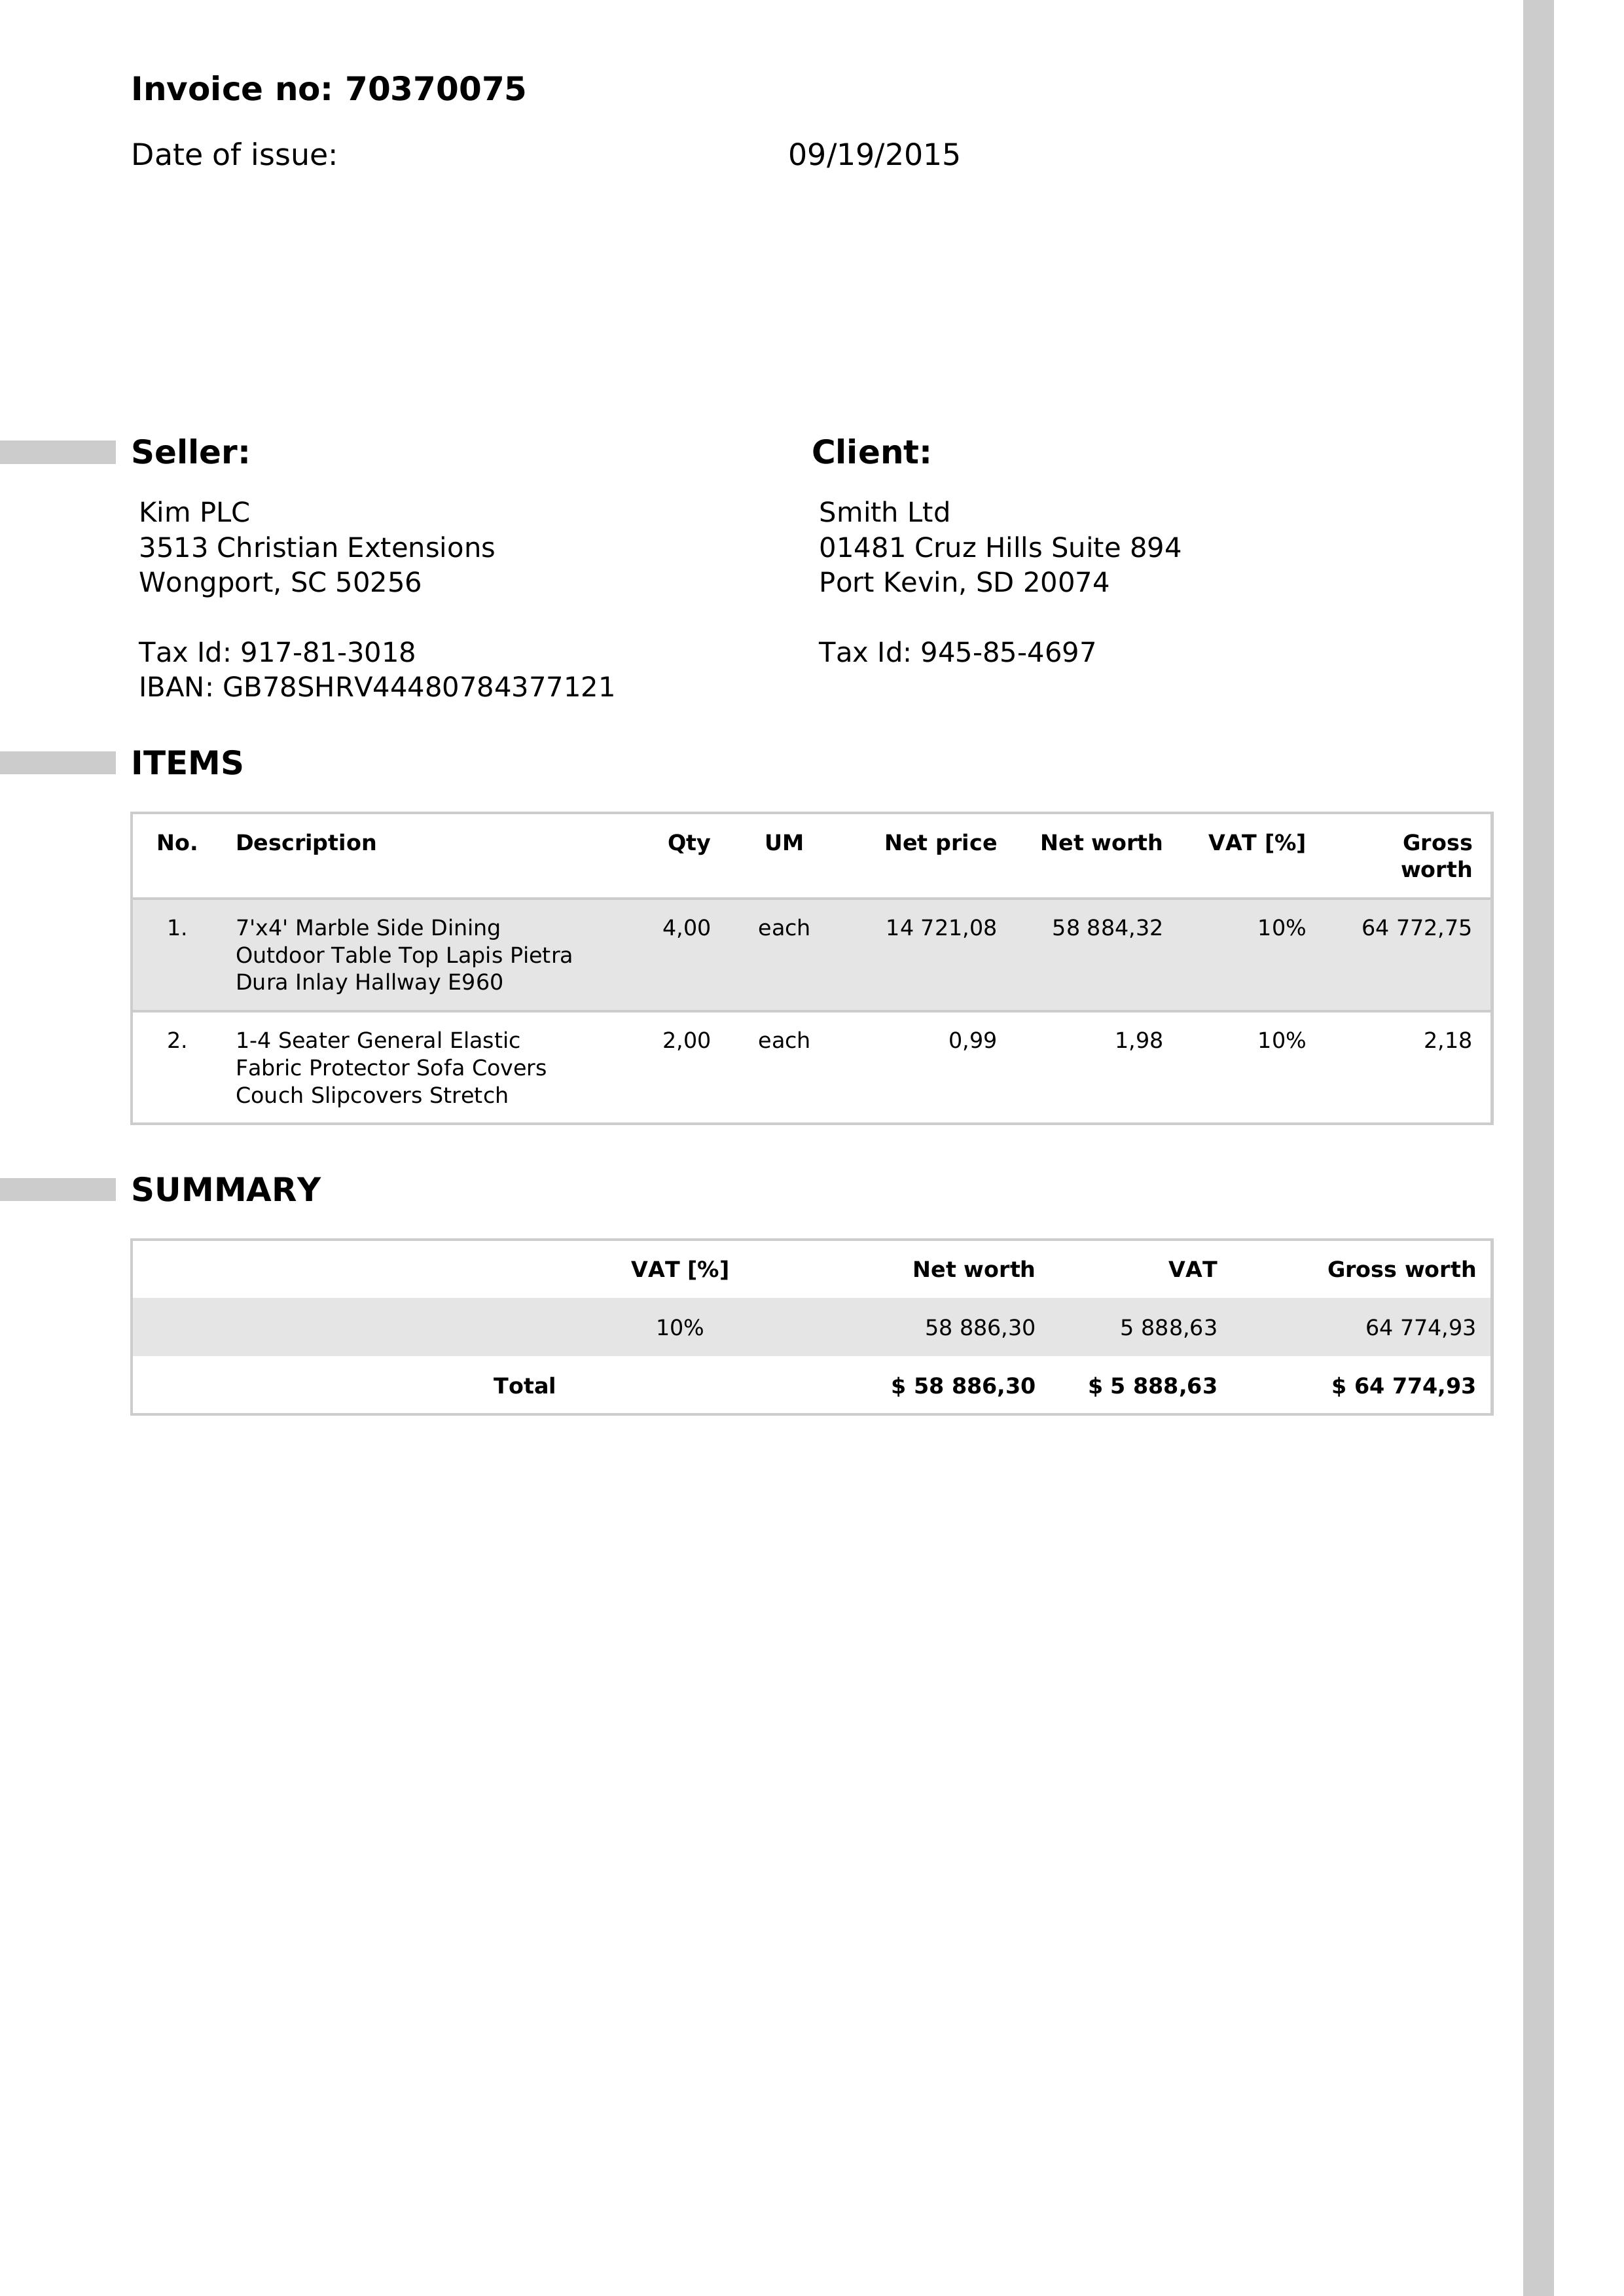

In [6]:
img = Image.open("test_images/invoice_940.jpg")
img

In [7]:
x = infer(image=img)

/home/rjn/miniconda3/envs/ttb/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:588: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


In [8]:
x

{'header': {'invoice_no': '70370075',
  'invoice_date': '09/19/2015',
  'seller': 'Kim PLC 3513 Christian Extensions Wongport, SC 50256',
  'client': 'Smith Ltd 01481 Cruz Hills Suite 894 Port Kevin, SD 20074',
  'seller_tax_id': '917-81-3018',
  'client_tax_id': '945-85-4697',
  'iban': 'GB785HRV44480784377121'},
 'items': [{'item_desc': "7'x4' Marble Side Dining Outdoor Table Top Lapis Pietra Dura Inlay Hallway E960",
   'item_qty': '4,00',
   'item_net_price': '14 721,08',
   'item_net_worth': '5884,32',
   'item_vat': '10%',
   'item_gross_worth': '64 772,75'},
  {'item_desc': '1-4 Seater General Elastic Fabric Protector Sofa Covers Couch Slipcovers Stretch',
   'item_qty': '2,00',
   'item_net_price': '0,99',
   'item_net_worth': '1,98',
   'item_vat': '10%',
   'item_gross_worth': '2,18'}],
 'summary': {'total_net_worth': '$5886,30',
  'total_vat': '$5888,63',
  'total_gross_worth': '$64774,93'}}

In [9]:
connection_url = "postgresql://postgres:@localhost:5432/invoice_db"

In [10]:
from src.database_utils import InvoiceDatabase

In [11]:
invoice_db = InvoiceDatabase(connection_url)
invoice_db.create_tables()

In [12]:
invoice_db.push_data(x)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "header_pkey"
DETAIL:  Key (invoice_no)=(70370075) already exists.

[SQL: INSERT INTO header (invoice_no, invoice_date, seller, client, seller_tax_id, client_tax_id, iban) VALUES (%(invoice_no)s, %(invoice_date)s, %(seller)s, %(client)s, %(seller_tax_id)s, %(client_tax_id)s, %(iban)s)]
[parameters: {'invoice_no': '70370075', 'invoice_date': '09/19/2015', 'seller': 'Kim PLC 3513 Christian Extensions Wongport, SC 50256', 'client': 'Smith Ltd 01481 Cruz Hills Suite 894 Port Kevin, SD 20074', 'seller_tax_id': '917-81-3018', 'client_tax_id': '945-85-4697', 'iban': 'GB785HRV44480784377121'}]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [12]:
invoice_db.fetch_record(invoice_no="70370075")

{'header': {'invoice_no': '70370075',
  'invoice_date': '09/19/2015',
  'seller': 'Kim PLC 3513 Christian Extensions Wongport, SC 50256',
  'client': 'Smith Ltd 01481 Cruz Hills Suite 894 Port Kevin, SD 20074',
  'seller_tax_id': '917-81-3018',
  'client_tax_id': '945-85-4697',
  'iban': 'GB785HRV44480784377121'},
 'items': [{'item_desc': "7'x4' Marble Side Dining Outdoor Table Top Lapis Pietra Dura Inlay Hallway E960",
   'item_qty': 4.0,
   'item_net_price': 14721.08,
   'item_net_worth': 5884.32,
   'item_vat': 10.0,
   'item_gross_worth': 64772.75},
  {'item_desc': '1-4 Seater General Elastic Fabric Protector Sofa Covers Couch Slipcovers Stretch',
   'item_qty': 2.0,
   'item_net_price': 0.99,
   'item_net_worth': 1.98,
   'item_vat': 10.0,
   'item_gross_worth': 2.18}],
 'summary': {'total_net_worth': 5886.3,
  'total_vat': 5888.63,
  'total_gross_worth': 64774.93}}

In [13]:
database_info_dict = {
    "host_name" : "localhost" , 
    "port" : 5432,
    "username" : "postgres",
    "database_name" :"invoice_db" ,
    "database_type":"PostgreSQL",
    "password": None,
}

In [14]:
database_info_dict

{'host_name': 'localhost',
 'port': 5432,
 'username': 'postgres',
 'database_name': 'invoice_db',
 'database_type': 'PostgreSQL',
 'password': None}

In [15]:
from src.db_connector import DatabaseAgent

In [16]:
agent = DatabaseAgent(**database_info_dict)

Connection to MySQL database successful!


In [18]:
agent.grab_table_schema()

TypeError: DatabaseAgent.grab_table_schema() missing 1 required positional argument: 'tables'